In [1]:
# let's suppress warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the data
attributeNames=['Submission_ID','Submission_Date','First_Name','Domain','Job_Title','City','Postcode','VISA_1','VISA','Salary_Expectation']
Order = pd.read_csv("websignup-ORDER09.csv", encoding="ISO-8859-1", delimiter=",",decimal=".",names = attributeNames, header = None,skiprows=1)

In [4]:
# Displaying first 5 rows of the data
Order.head()

,Submission_ID,Submission_Date,First_Name,Domain,Job_Title,City,Postcode,VISA_1,VISA,Salary_Expectation
0,4695615393484727500,2020-07-02 23:59:00,Shreyans,gmail.com,Cyber Security Analyst,Melbourne,NaN,NaN,Student visa,60-80k
1,4695512025417490581,2020-07-02 21:06:43,Kavneet,gmail.com,Digital Marketing,Melbourne,NaN,NaN,Full work rights,38k-45K
2,4695419510215392546,2020-07-02 18:32:32,Roba,gmail.com,Graphic designer,Cairo,NaN,NaN,Student visa,1500/2000
3,4695013657122586655,2020-07-02 07:16:06,Nicole,iinet.net.au,Head of Operational Delivery,Melbourne,NaN,NaN,NaN,$230k+
4,4694929106124153927,2020-07-02 04:55:10,Abdullah,gmail.com,Farmers controller,Gujar Khan Pakistan,NaN,NaN,Citizen,NaN


In [5]:
Order.shape

(2614, 10)

### Treating Missing Values

#### *Determining total number of Missing values in each column in the Dataframe*

In [6]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(Order)

Your selected dataframe has 10 columns and 2614 Rows.
There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
VISA_1,0,2511,96.1,2511,96.1,object
Postcode,0,2188,83.7,2188,83.7,object
Job_Title,0,503,19.2,503,19.2,object
Salary_Expectation,0,484,18.5,484,18.5,object
VISA,0,277,10.6,277,10.6,object
City,0,66,2.5,66,2.5,object
Domain,0,28,1.1,28,1.1,object
First_Name,0,19,0.7,19,0.7,object


In [7]:
# Dropping the columns with higher % of missing values and Submission ID feature is removed as it is irrelevant for analysis
Order.drop(['VISA_1','Postcode','Submission_ID'],axis=1, inplace=True)
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation
0,2020-07-02 23:59:00,Shreyans,gmail.com,Cyber Security Analyst,Melbourne,Student visa,60-80k
1,2020-07-02 21:06:43,Kavneet,gmail.com,Digital Marketing,Melbourne,Full work rights,38k-45K
2,2020-07-02 18:32:32,Roba,gmail.com,Graphic designer,Cairo,Student visa,1500/2000
3,2020-07-02 07:16:06,Nicole,iinet.net.au,Head of Operational Delivery,Melbourne,NaN,$230k+
4,2020-07-02 04:55:10,Abdullah,gmail.com,Farmers controller,Gujar Khan Pakistan,Citizen,NaN


In [8]:
# Determining the data types of the variables
Order.dtypes

Submission_Date       object
First_Name            object
Domain                object
Job_Title             object
City                  object
VISA                  object
Salary_Expectation    object
dtype: object

Order[['SubmissionDate','SubmissionTime']] = Order.Submission_Date.apply( 
   lambda x: pd.Series(str(x).split(" "))) 
Order.drop(['Submission_Date'],axis=1, inplace=True)
Order.head() 

In [9]:
print(f"\nNumber of missing values for each feature in the dataset is given below:")
print(Order.isna().sum())


Number of missing values for each feature in the dataset is given below:
Submission_Date         0
First_Name             19
Domain                 28
Job_Title             503
City                   66
VISA                  277
Salary_Expectation    484
dtype: int64


In [10]:
Order=Order.dropna()
print(f"\nNumber of missing values for each feature in the dataset post removal of missing values:")
print(Order.isna().sum())
print(f"\nShape of the dataset post removal of missing values:")
print(Order.shape)
Order.head()


Number of missing values for each feature in the dataset post removal of missing values:
Submission_Date       0
First_Name            0
Domain                0
Job_Title             0
City                  0
VISA                  0
Salary_Expectation    0
dtype: int64

Shape of the dataset post removal of missing values:
(1635, 7)


,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation
0,2020-07-02 23:59:00,Shreyans,gmail.com,Cyber Security Analyst,Melbourne,Student visa,60-80k
1,2020-07-02 21:06:43,Kavneet,gmail.com,Digital Marketing,Melbourne,Full work rights,38k-45K
2,2020-07-02 18:32:32,Roba,gmail.com,Graphic designer,Cairo,Student visa,1500/2000
5,2020-07-02 04:52:57,Arooj,outlook.com,Phone operater,Sargodha,Citizen,30'thousand
6,2020-07-02 01:45:27,Manisha,yahoo.com.au,Receptionist/admin assistant,Sydney,Citizen,60-65k


Thus, we observe that the null values are removed as imputing them would not add sense onto the data. However,the "**Salary Expectation**" column could be imputed, with extra information regarding job designations or we could implement binning to categorize salary into brackets.

In [11]:
Order.describe(include = np.object)

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation
count,1635,1635,1635,1635,1635,1635,1635
unique,1635,1305,103,1136,514,7,716
top,2020-01-12 17:43:12,Muhammad,gmail.com,Business Analyst,Melbourne,Full work rights,60k
freq,1,8,1157,40,558,514,51


# Data preparation
* Dealing with leading and trailing white spaces
* Removing unnecessary symbols
* Removing all numeric variables
* Converting all the features in the data as type object
* Casting the data onto upper case for case consistency

In [12]:
for col in ['City', 'Job_Title']:
    print('Unique values of ' + col)
    print(Order[col].unique())
    Order[col] = Order[col].str.replace('\d+', '') #removes all numeric variables
    Order[col]=Order[col].str.strip() #removes leading and trailing white spaces
    Order[col] = Order[col].replace({'-': '', '/': '', '`': ''}, regex=True) #removes unnecessary symbols
    Order[col] = Order[col].astype(str) #object dtype
    Order[col] = Order[col].apply(lambda x: x.upper()) #Upper case
    print('After transformation Unique values of ' + col)
    print(Order[col].unique())

Unique values of City
['Melbourne' 'Cairo' 'Sargodha' 'Sydney' 'Perth' 'Sydney ' 'WYNDHAM VALE'
 'Hyderabad' 'Tathra' 'Lagos' 'West Footscray' 'melbourne' 'karnal'
 'Melbourne ' 'Geelong ' 'Any' 'tirana' 'MELBOURNE' 'Alexandria'
 'All Australia' 'Khandwa' 'Brisbane' 'MERNDA' 'Cebu, Philippines'
 'Baulkham Hills' 'Bundoora' 'Syndey (home Office)' 'Bexley'
 'BROADMEADOWS' 'Camperdown' 'Jos' 'Lahore' 'Ballina' 'Rowville' 'Seaford'
 'Toorak' 'New Delhi' 'Tembisa' 'Hampton' 'South Hobart' 'Chennai'
 'Broadmeadows' 'Flemington' 'Berwick' 'Cambridge Park ' 'SOUTH YARRA'
 'lidcombe' 'Consolacion' 'South Morang' 'Rockhampton Qld' 'Clayton South'
 'VIC' 'Madhepura' 'Torotto' 'delhi' 'Lakemba' 'Parramatta ' 'Bihar'
 'Lucknow ' 'Karimnagar ' 'THE GARDENS' 'ALLAHABAD' 'Bharuch' 'Mumbai '
 'WERRIBEE' 'Glen Waverley' 'Caulfield east' ' Melbourne'
 'DOCKLANDS (VIC)' 'Wantirna South' 'Fitzroy North' 'Driver'
 'Malvern East' 'Springvale' 'Westmeadows ' 'CLAYTON' 'Oakleigh'
 'melbourne vic' 'Glenroy' 'Bo

In [13]:
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000
5,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand
6,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k


#### Determining Value counts of each object variable

In [14]:
categorical_cols = Order.columns[Order.dtypes == np.object].tolist()
for col in categorical_cols:
    print(col,Order[col].value_counts())
    print('')

Submission_Date 2020-01-12 17:43:12    1
2020-04-27 20:36:16    1
2020-03-22 07:24:05    1
2020-01-21 00:21:40    1
2019-07-18 20:13:38    1
                      ..
2020-03-03 21:47:04    1
2020-02-10 23:38:05    1
2019-12-16 15:49:04    1
2019-02-02 02:43:12    1
2020-03-25 09:09:47    1
Name: Submission_Date, Length: 1635, dtype: int64

First_Name Muhammad     8
Jessica      8
John         7
Sarah        6
Shivani      6
            ..
Cormack      1
Campbell     1
Crystelle    1
Anja         1
Tharini      1
Name: First_Name, Length: 1305, dtype: int64

Domain gmail.com           1157
hotmail.com          125
yahoo.com             77
outlook.com           66
icloud.com            14
                    ... 
protonmail.com         1
ch.iitr.ac.in          1
accelerer.com.au       1
iinet.net.au           1
hotmail.es             1
Name: Domain, Length: 103, dtype: int64

Job_Title BUSINESS ANALYST                              44
SOFTWARE DEVELOPER                            32
CUSTO

**Future Work** Typo inconsistencies in columns can be addressed and corrected using masks. 

In [15]:
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000
5,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand
6,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k


# Feature Engineering

### Country

In [16]:
Order_cty = Order.copy()

In [17]:
Order_cty.shape

(1635, 7)

In [18]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [19]:
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="name")

import operator

geolocate_column = Order_cty['City'].apply(geolocator.geocode)


non_null_geolocate_column = geolocate_column[~geolocate_column.isnull()]
Order_cty['latitude'] = None
Order_cty['latitude'] = non_null_geolocate_column.apply(operator.attrgetter('latitude'))
Order_cty['longitude'] = None
Order_cty['longitude'] = non_null_geolocate_column.apply(operator.attrgetter('longitude'))

In [20]:
Order_loc = Order_cty.copy()

In [21]:
print(Order_loc.isna().sum())

Submission_Date        0
First_Name             0
Domain                 0
Job_Title              0
City                   0
VISA                   0
Salary_Expectation     0
latitude              29
longitude             29
dtype: int64


In [22]:
Order_loc['latitude'] = Order_loc['latitude'].fillna("Not Found")
Order_loc['longitude'] = Order_loc['longitude'].fillna("Not Found")

In [23]:
Order_loc.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,latitude,longitude
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k,-37.8142,144.963
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K,-37.8142,144.963
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,30.0488,31.2437
5,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand,32.0898,72.6783
6,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k,-33.8548,151.216


In [24]:
print(Order_loc.isna().sum())

Submission_Date       0
First_Name            0
Domain                0
Job_Title             0
City                  0
VISA                  0
Salary_Expectation    0
latitude              0
longitude             0
dtype: int64


In [25]:
(Order_loc == 'Not Found').sum()

Submission_Date        0
First_Name             0
Domain                 0
Job_Title              0
City                   0
VISA                   0
Salary_Expectation     0
latitude              29
longitude             29
dtype: int64

In [26]:
Order_loc['LatnLong'] = (Order_loc['latitude'].astype(str) + ',' + Order_loc['longitude'].astype(str))

In [27]:
Order_loc_na = Order_loc.loc[Order_loc['LatnLong']== 'Not Found,Not Found']

In [28]:
outerdf = pd.merge(Order_loc, Order_loc_na, how='outer', indicator=True)

In [29]:
outerdf = (outerdf.loc[outerdf._merge == 'left_only'])
outerdf.shape

(1606, 11)

In [30]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="name2")
def city_state_country(addr):
    #locs = geolocator.geocode(addr)
    #coords = (locs.latitude, locs.longitude)
    location = geolocator.reverse(addr, exactly_one=True,language='en')
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return city, state, country 

In [31]:
print(city_state_country(outerdf['LatnLong'][6]))

('', 'Victoria', 'Australia')


In [32]:
outerdf.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,latitude,longitude,LatnLong,_merge
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k,-37.8142,144.963,"-37.8142176,144.9631608",left_only
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K,-37.8142,144.963,"-37.8142176,144.9631608",left_only
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,30.0488,31.2437,"30.048819,31.243666",left_only
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand,32.0898,72.6783,"32.0898005,72.6782574",left_only
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k,-33.8548,151.216,"-33.8548157,151.2164539",left_only


In [33]:
outerdf['nCity'] = outerdf['LatnLong'].apply(city_state_country)

In [34]:
outerdf.nCity.head()

0                 (, Victoria, Australia)
1                 (, Victoria, Australia)
2                        (Cairo, , Egypt)
3            (Sargodha, Punjab, Pakistan)
4    (Sydney, New South Wales, Australia)
Name: nCity, dtype: object

In [35]:
outerdf1 = outerdf.copy()

In [36]:
outerdf1.nCity.head()

0                 (, Victoria, Australia)
1                 (, Victoria, Australia)
2                        (Cairo, , Egypt)
3            (Sargodha, Punjab, Pakistan)
4    (Sydney, New South Wales, Australia)
Name: nCity, dtype: object

In [37]:
outerdf1[['Cities','State', 'Country']] = pd.DataFrame(outerdf1.nCity.tolist(), index= outerdf1.index)

In [38]:
outerdf1.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,latitude,longitude,LatnLong,_merge,nCity,Cities,State,Country
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k,-37.8142,144.963,"-37.8142176,144.9631608",left_only,"(, Victoria, Australia)",,Victoria,Australia
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K,-37.8142,144.963,"-37.8142176,144.9631608",left_only,"(, Victoria, Australia)",,Victoria,Australia
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,30.0488,31.2437,"30.048819,31.243666",left_only,"(Cairo, , Egypt)",Cairo,,Egypt
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand,32.0898,72.6783,"32.0898005,72.6782574",left_only,"(Sargodha, Punjab, Pakistan)",Sargodha,Punjab,Pakistan
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k,-33.8548,151.216,"-33.8548157,151.2164539",left_only,"(Sydney, New South Wales, Australia)",Sydney,New South Wales,Australia


In [39]:
Order = outerdf1.drop(['latitude','longitude','LatnLong','_merge','nCity','Cities' ],axis=1)

In [40]:
Order= Order.replace(r'^\s*$', np.NaN, regex=True)

In [41]:
Order["Country"].fillna("Unknown", inplace = True) 
Order["State"].fillna("Unknown", inplace = True) 
Order["City"].fillna("Unknown", inplace = True) 

In [42]:
for col in ['Country', 'State']:
    print('Unique values of ' + col)
    print(Order[col].unique())
    Order[col] = Order[col].str.replace('\d+', '') #removes all numeric variables
    Order[col]=Order[col].str.strip() #removes leading and trailing white spaces
    Order[col] = Order[col].replace({'-': '', '/': '', '`': ''}, regex=True) #removes unnecessary symbols
    Order[col] = Order[col].astype(str) #object dtype
    Order[col] = Order[col].apply(lambda x: x.upper()) #Upper case
    print('After transformation Unique values of ' + col)
    print(Order[col].unique())

Unique values of Country
['Australia' 'Egypt' 'Pakistan' 'India' 'Nigeria' 'Russia' 'Albania'
 'Philippines' 'United States of America' 'South Africa' 'United Kingdom'
 'Italy' 'South Korea' 'Canada' 'Bangladesh' 'France' 'Rwanda' 'Malaysia'
 'Taiwan' 'Indonesia' 'Argentina' 'Bulgaria' 'Fiji' 'Saudi Arabia' 'Japan'
 'Qatar' 'Brazil' 'Germany' 'Singapore' 'United Arab Emirates' 'Malawi'
 'Sweden' 'Iran' 'Macedonia' 'New Zealand' 'Kenya' 'Oman']
After transformation Unique values of Country
['AUSTRALIA' 'EGYPT' 'PAKISTAN' 'INDIA' 'NIGERIA' 'RUSSIA' 'ALBANIA'
 'PHILIPPINES' 'UNITED STATES OF AMERICA' 'SOUTH AFRICA' 'UNITED KINGDOM'
 'ITALY' 'SOUTH KOREA' 'CANADA' 'BANGLADESH' 'FRANCE' 'RWANDA' 'MALAYSIA'
 'TAIWAN' 'INDONESIA' 'ARGENTINA' 'BULGARIA' 'FIJI' 'SAUDI ARABIA' 'JAPAN'
 'QATAR' 'BRAZIL' 'GERMANY' 'SINGAPORE' 'UNITED ARAB EMIRATES' 'MALAWI'
 'SWEDEN' 'IRAN' 'MACEDONIA' 'NEW ZEALAND' 'KENYA' 'OMAN']
Unique values of State
['Victoria' 'Unknown' 'Punjab' 'New South Wales' 'Western Au

In [43]:
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k,VICTORIA,AUSTRALIA
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K,VICTORIA,AUSTRALIA
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand,PUNJAB,PAKISTAN
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k,NEW SOUTH WALES,AUSTRALIA


### Job Domain

Let's split the Job_Title column as 1 person may have purchased for services with more than 1 roles.

In [44]:
Order=Order.assign(Job_Title=Order['Job_Title'].str.split(',')).explode('Job_Title')

In [45]:
Order.shape

(1708, 9)

We, observe that there are rows of data which are redundant, where in a customer logs in using same job titles multiple times. This data is irrelevant as they are duplicates and thus, must be dropped. 

In [46]:
Order = Order.drop_duplicates(['First_Name','Job_Title','City'], keep='last')

Assigning categories (Job_Domains) based on Job_Titles

In [47]:
values = ['PROJECT COORDINATOR','PROJECT ASSISTANT',' PROJECT SCHEDULER','PROJECT ENGINEER',' FORKLIFT',
          'ARCHITECT','FRONT END DEVLOPER','BOOK','COMMUNICATIONS','ADMINISTRATION','ADMINISTRATOR','ADMINISTRATIVE',
          'EDUCAT','BARISTA','FRUIT PACK',' FORLKIFT','TRANSLATOR','GRAPHIC','OPERATIONS','PROGRAMMING','DATA ANALYSIS','.NET DEVELOPLER','CREATIVE PHOTOGRAPH DESIGNER','BUSINESSDIGITAL','GRAPHIC AND TEXTILE DESIGNER','GRAPHIC  DIGITAL DESIGNER','BISINESS ANALYST','WERHOUSE','WAREHOUSE','CLERK',
          'UX| UI DESIGNER','INFORMATION TECHNOLOGY','IT LEVEL','ITADMINISTRATION','IT SECTOR','IT SENIOR MANAGER','IT JOB','IT DIRECTOR',
          'IT DESKTOP ANALYST','IT SECURITY','IT EXEUTIVE','IT RISK','IT OPERATIONS','IT OFFICER','IT RELATED','IT ADMINISTRATOR',
          'TEAM LEAD','CIO','CEO','CHIEF EXECUTIVE OFFICER','CLEANER','PMO','PROJECTCHANGE MANAGER','PROJECT DELIVERY MANAGER','PROJECT  PROGRAM  SCRUM MANAGER',
          'NURSING','JOB SEEKER','DAYA ANALYST','CHEMICAL','FINANCE OFFICER','BANKING AND FINANCIAL SERVICES','FINANCE MANAGER',
          'FINANCIAL COORDINATOR','IT DIRECTOR ,ANALYST','CONSTRUCTION RELATED','CRANE TRUCK','CONSTRUCTION WORKER','SITE SUPERVISOR',
          'IT ENTRY LEVEL','COMPUTER,IT','COMPUTER SCIENCE ENGINEER','BUSINESS DEVELOPMENT','IT FRESHERS','ENTRY LEVEL','IT MANAGER',
          'DATA AND ANALYTICS','GRAPHIC DESIGN','PROJECT MANAGEMENT','DEVELOEPR','ICT','DEVOPS','PYTHON','ELECTRICAL','ELECTRONIC',
          'TELECOM','ADVERTISING','BUSINESS ANALYST','SQL','DATA ENGINEER','DATA ANALYST','DATA SCIENTIST','EVENT MANAGERDIRECTOR',
          'EVENTS COORDINATOR','EVENT MANAGER','HELPDESK','HELP DESK','BARTENDER','ANY','RECEPCIONIST','RECEOPTION','PART TIME','CIVIL',
          'DATA ENTRY','IOT','CHEF','KITCHEN','CATERING','HR','HUMAN','GRADUATE','FOOD','INTERN','CONSULTANT','DEVELOPER','ACCOUNT',
          'CUSTOMER','CYBER','WEB','WEBSITE', 'WORDPRESS','WAIT', 'VIRTUAL', 'UNEMPLOYED', 'TUTOR', 'VOLUNTEER', 'TEST', 'TESTER', 
          'TESTING','TECHNICIAN','TECHNICAL SUPPORT','TEACHER','TALENT ACQUISITION', 'SYSTEMS', 'SYSTEM','SUSTAINABILITYENVIRONMENT',
          'SUPPORT', 'STUDENT', 'STORE', 'SOFTWARE','SOCIAL MEDIA', 'SERVICE DESK', 'SERVICE DELIVERY', 'SCRUM MASTER', 'SAP',
         'SALESFORCE', 'SALES', 'RETAIL', 'RETAILER','RESTAURANT','RESEARCH', 'REPORTING ANALYST','NURSE','REMOTE', 'RECRUITER',
          'RECRUITMENT','RECEPTIONIST', 'RECEPTION', 'QUALITY ASSURANCE', 'QA', 'PROJECT MANAGER', 'PROGRAMMER', 'PROGRAM MANAGER',
         'PRODUCT', 'PICK', 'PHP', 'PARALEGAL', 'ONLINE CUSTOMER SERVICE', 'ONLINE RECEPTIONIST', 'ONLINE SALES ASSISTANT',
         'OFFICE SUPPORT', 'NETWORK', 'MECHANICAL ENGINEER', 'MECHATRONICS', 'MARKETING', 'MARKETER', 'LOOKING FOR',
         'LABOURER', 'LABOURING']
conditions = list(map(Order['Job_Title'].str.contains, values))
assign =['PROJECT MANAGEMENT','PROJECT MANAGEMENT','PROJECT MANAGEMENT','PROJECT MANAGEMENT','CONSTRUCTION',
         'ARCHITECT','SOFTWARE DEVELOPER','BOOK KEEPER','COMMUNICATIONS','ADMINISTRATION','ADMINISTRATION','ADMINISTRATION',
        'TUTOR','FOOD SERVICE','PICK PACKER','CONSTRUCTION','TRANSLATOR','GRAPHIC DESIGNER','OPERATIONS',
         'SOFTWARE DEVELOPER','DATA ANALYST/SCIENTIST','SOFTWARE DEVELOPER','GRAPHIC DESIGNER','BUSINESS ANALYST','GRAPHIC DESIGNER','GRAPHIC DESIGNER','BUSINESS ANALYST','WAREHOUSE','WAREHOUSE','CLERK',
         'UX| UI DESIGNER','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY',
         'INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY',
         'INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY','INFORMATION TECHNOLOGY',
         'TEAM LEAD','CIO','CEO','CEO','CLEANER','PROJECT MANAGEMENT','PROJECT MANAGEMENT','PROJECT MANAGEMENT','PROJECT MANAGEMENT',
        'NURSING PERSONAL CARE ASSISTANT','ANY OPPORTUNITY','DATA ANALYST/SCIENTIST','CHEMICAL ENGINEER','FINANCE','FINANCE','FINANCE',
         'FINANCE','BUSINESS ANALYST','CONSTRUCTION','CONSTRUCTION','CONSTRUCTION','CONSTRUCTION','ENTRY LEVEL','SOFTWARE','SOFTWARE',
         'BUSINESS DEVELOPMENT','ENTRY LEVEL','ENTRY LEVEL','IT MANAGER','DATA ANALYST/SCIENTIST','GRAPHIC DESIGNER','PROJECT MANAGEMENT','SOFTWARE DEVELOPER',
         'ICT','DEVOPS ENGINEER','SOFTWARE DEVELOPER','TELECOMMUNICATION','TELECOMMUNICATION','TELECOMMUNICATION','MARKETING','BUSINESS ANALYST','SOFTWARE DEVELOPER',
         'DATA ENGINEER','DATA ANALYST/SCIENTIST','DATA ANALYST/SCIENTIST','EVENT MANAGEMENT','EVENT MANAGEMENT',
         'EVENT MANAGEMENT','SUPPORT TECHNICIAN','SUPPORT TECHNICIAN','FOOD SERVICE','ANY OPPORTUNITY','RECEPTIONIST','RECEPTIONIST','PART TIME','CIVIL ENGINEER',
         'DATA ENTRY','IOT','FOOD SERVICE','FOOD SERVICE','FOOD SERVICE','HUMAN RESOURCE','HUMAN RESOURCE','GRADUATE ROLE','FOOD SERVICE','INTERNSHIP','CONSULTANT',
         'SOFTWARE DEVELOPER','ACCOUNTING','CUSTOMER SERVICE','CYBER SECURITY','WEB DEVELOPER', 'WEB DEVELOPER', 'WEB DEVELOPER','WAIT STAFF', 'VIRTUAL ASSISTANT', 
         'UNEMPLOYED', 'TUTOR','VOLUNTEER', 'QUALITY ASSURANCE','QUALITY ASSURANCE','QUALITY ASSURANCE','TECHNICIAN','TECHNICAL SUPPORT','TUTOR','TALENT ACQUISITION', 'SYSTEMS',  'SYSTEMS',
        'SUSTAINABILITY ENVIRONMENT', 'SUPPORT TECHNICIAN', 'STUDENT', 'RETAIL ASSISTANT', 'SOFTWARE','SOCIAL MEDIA', 'SERVICE DESK',
        'SERVICE DELIVERY', 'SCRUM MASTER', 'SAP CONSULTANT', 'SALESFORCE ADMIN', 'SALES','RETAIL ASSISTANT','RETAIL ASSISTANT',
        'WAIT STAFF', 'RESEARCH', 'REPORTING ANALYST', 'NURSING PERSONAL CARE ASSISTANT','REMOTE','RECRUITMENT','RECRUITMENT','RECEPTIONIST','RECEPTIONIST',
        'QUALITY ASSURANCE', 'QUALITY ASSURANCE', 'PROJECT MANAGEMENT', 'SOFTWARE DEVELOPER', 'PROGRAM MANAGER','PRODUCT', 'PICK PACKER',
         'PHP DEVELOPER', 'PARALEGAL', 'ONLINE CUSTOMER SERVICE', 'ONLINE CUSTOMER SERVICE','ONLINE CUSTOMER SERVICE','OFFICE SUPPORT',
        'NETWORK ENGINEER', 'MECHANICAL ENGINEER', 'MECHANICAL ENGINEER', 'MARKETING', 'MARKETING', 'UNEMPLOYED', 'LABOURER',
        'LABOURER']
        
Order['Job_Domain'] = np.select(conditions, assign)

Job_titles which were not understandable/filled with irrelevant texts have been stored into the Domain of OTHER

In [48]:
level_mapping = {'0': 'OTHER'}
Order['Job_Domain'] = Order['Job_Domain'].replace(level_mapping)
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k,VICTORIA,AUSTRALIA,CYBER SECURITY
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45K,VICTORIA,AUSTRALIA,MARKETING
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30'thousand,PUNJAB,PAKISTAN,OTHER
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST


In [49]:
Order['Job_Domain'].unique()

array(['CYBER SECURITY', 'MARKETING', 'GRAPHIC DESIGNER', 'OTHER',
       'RECEPTIONIST', 'SOFTWARE DEVELOPER', 'CIVIL ENGINEER',
       'DATA ENTRY', 'QUALITY ASSURANCE', 'CONSULTANT', 'SALES',
       'HUMAN RESOURCE', 'UNEMPLOYED', 'GRADUATE ROLE', 'INTERNSHIP',
       'BUSINESS ANALYST', 'ACCOUNTING', 'IOT', 'SOFTWARE',
       'ADMINISTRATION', 'SYSTEMS', 'SUPPORT TECHNICIAN',
       'INFORMATION TECHNOLOGY', 'MECHANICAL ENGINEER',
       'CUSTOMER SERVICE', 'TELECOMMUNICATION', 'SOCIAL MEDIA', 'CLERK',
       'TRANSLATOR', 'PROJECT MANAGEMENT', 'VIRTUAL ASSISTANT', 'STUDENT',
       'ENTRY LEVEL', 'TALENT ACQUISITION', 'DATA ANALYST/SCIENTIST',
       'CLEANER', 'FOOD SERVICE', 'ANY OPPORTUNITY', 'RETAIL ASSISTANT',
       'TEAM LEAD', 'WAIT STAFF', 'SUSTAINABILITY ENVIRONMENT',
       'PROGRAM MANAGER', 'PRODUCT', 'NURSING PERSONAL CARE ASSISTANT',
       'ARCHITECT', 'BOOK KEEPER', 'BUSINESS DEVELOPMENT', 'TUTOR',
       'REPORTING ANALYST', 'REMOTE', 'NETWORK ENGINEER',
       '

### Salary Expectation

In [50]:
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace(" ", "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.strip()
Order['Salary_Expectation'] = Order['Salary_Expectation'].apply(lambda x: x.lower()) #lower case
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("perhour", "/hr")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("perHour", "/hr")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("Â£", "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("ph", "/hr")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("perhr", "/hr")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("+", "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('dependingonworkagreement', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('>', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace( "'", '')
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('plus','')
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('(highlynegotiable).', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace("+", "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('inSydneyMelbourneifyoucoverLondon.', '')
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('above', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace( "perannum", '')
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('perannual', '')
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('forthevolunteerjob', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('about', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('minimum', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('super', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('dollar', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('aud', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('/annum', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('annual', "")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('thousand', "k")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('*', "-")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('(-comms)', "-")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('to', "-")
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('Ã¢Â£', '')

In [51]:
values = ['5','42','2','3','32','56','67','26','17','8','1/w','0','28','27,''10','4', '15','20','21','22','23','24' ,'25', '29','30', '33','35','40', '45','47','48','50','52','53','55', '57','60', '65',
          '68','70','75','80','85', '90', '95',
          '100k', '110k','115k', '120k', '125k', '130k', '135k', '140k', '145k', '150k',
         '160k','170k', '180k', '185k', '190k','200k']
conditions = list(map(Order['Salary_Expectation'].str.contains, values))
assign =['30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k',
         '30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k',
         '30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k','30-70k',
         '70-110k','70-110k','70-110k','70-110k','70-110k','70-110k',
         '110-150k','110-150k','110-150k','110-150k','110-150k','110-150k','110-150k','110-150k','110-150k','110-150k',
        '110-150k','110-150k','110-150k','110-150k','110-150k','110-150k']
Order['Salary_Range'] = np.select(conditions, assign)
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain,Salary_Range
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80k,VICTORIA,AUSTRALIA,CYBER SECURITY,30-70k
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38k-45k,VICTORIA,AUSTRALIA,MARKETING,30-70k
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER,30-70k
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30k,PUNJAB,PAKISTAN,OTHER,30-70k
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65k,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST,30-70k


In [52]:
Order['Salary_Expectation'] = Order['Salary_Expectation'].str.replace('k', '')
Order.loc[Order['Salary_Expectation'] == '110-120', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '110-130', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '110-125', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '110-135', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '110-140', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '180-250;950-1100p.d.', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '180', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '170-190', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '190', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '280', 'Salary_Range'] = '110-150k'
Order.loc[Order['Salary_Expectation'] == '90-110', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '110', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '85-110', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '95-110', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '100-110', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '110', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '80-100', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '80-120', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '90-120', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '90-100', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '70-100', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '85-130', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '85-100', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '75-100', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '95-120', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '96-120', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == 's80-100', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '611', 'Salary_Range'] = '70-110k'
Order.loc[Order['Salary_Expectation'] == '87', 'Salary_Range'] = '70-110k'

In [53]:
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain,Salary_Range
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80,VICTORIA,AUSTRALIA,CYBER SECURITY,30-70k
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38-45,VICTORIA,AUSTRALIA,MARKETING,30-70k
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER,30-70k
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30,PUNJAB,PAKISTAN,OTHER,30-70k
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST,30-70k


In [54]:
Order['Salary_Range'].value_counts()

30-70k      1458
70-110k       83
0             67
110-150k      18
Name: Salary_Range, dtype: int64

Salary expectations with no/irrelevant inputs are stored as NO EXPECTATION.

In [55]:
level_mapping = {'0': 'NO EXPECTATION'}
Order['Salary_Range'] = Order['Salary_Range'].replace(level_mapping)
Order.head()

,Submission_Date,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain,Salary_Range
0,2020-07-02 23:59:00,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80,VICTORIA,AUSTRALIA,CYBER SECURITY,30-70k
1,2020-07-02 21:06:43,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38-45,VICTORIA,AUSTRALIA,MARKETING,30-70k
2,2020-07-02 18:32:32,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER,30-70k
3,2020-07-02 04:52:57,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30,PUNJAB,PAKISTAN,OTHER,30-70k
4,2020-07-02 01:45:27,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST,30-70k


In [56]:
#Order[Order.index.duplicated()]

### Year, Month, DoW, DoM

In [57]:
def feature_eng(df, feature):
        
        #add new col names for train  and test and split date time
        df[['SubmissionDate','SubmissionTime']] = df[feature].apply(lambda x: pd.Series(str(x).split(" ")))
        #drop existing grass_date col
        df.drop([feature],axis=1, inplace=True)
        #convert to datetime again
        df['SubmissionDate']=pd.to_datetime(df['SubmissionDate'])
        
        #add new features for EDA and ML
        
        df['Year_Month'] = df['SubmissionDate'].dt.strftime('%Y-%m') #year-month
        df['Year'] = df['SubmissionDate'].dt.strftime('%Y') #Year
        df['Month'] = df['SubmissionDate'].dt.strftime('%m') #month
        df['DayofMonth'] = df['SubmissionDate'].dt.day #day of month
        df['DayofWeek'] = df['SubmissionDate'].dt.day_name() #day of week
        return df

In [58]:
feature_eng(Order,'Submission_Date')

,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain,Salary_Range,SubmissionDate,SubmissionTime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80,VICTORIA,AUSTRALIA,CYBER SECURITY,30-70k,2020-07-02,23:59:00,2020-07,2020,07,2,Thursday
1,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38-45,VICTORIA,AUSTRALIA,MARKETING,30-70k,2020-07-02,21:06:43,2020-07,2020,07,2,Thursday
2,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER,30-70k,2020-07-02,18:32:32,2020-07,2020,07,2,Thursday
3,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30,PUNJAB,PAKISTAN,OTHER,30-70k,2020-07-02,04:52:57,2020-07,2020,07,2,Thursday
4,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST,30-70k,2020-07-02,01:45:27,2020-07,2020,07,2,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,Akash,outlook.com,TRANSITION MANAGER,MELBOURNE,Citizen,150-180,VICTORIA,AUSTRALIA,OTHER,30-70k,2018-11-13,19:31:08,2018-11,2018,11,13,Tuesday
1630,Akash,outlook.com,,MELBOURNE,Citizen,150-180,VICTORIA,AUSTRALIA,OTHER,30-70k,2018-11-13,19:31:08,2018-11,2018,11,13,Tuesday
1632,christian,gmail.com,HELP DESK GAIN EXPERIENCE,MELBOURNE,Citizen,40,VICTORIA,AUSTRALIA,SUPPORT TECHNICIAN,30-70k,2018-10-31,20:02:42,2018-10,2018,10,31,Wednesday
1633,Sarmad,gmail.com,TELECOM CCO,MUSCAT,Sponsorship needed,130,MUSCAT,OMAN,TELECOMMUNICATION,30-70k,2018-10-29,03:16:34,2018-10,2018,10,29,Monday


Using various Feature Engineering Techniques, We have procured the following new features: 
* Countries from Cities 
* Job Domains from Job Titles 
* Salary Expectation is categorized into 4 categories
* Submission Date is split across year,month,day,week

# EDA: Data Visualization

### *An insight on visa types held by purchasers*

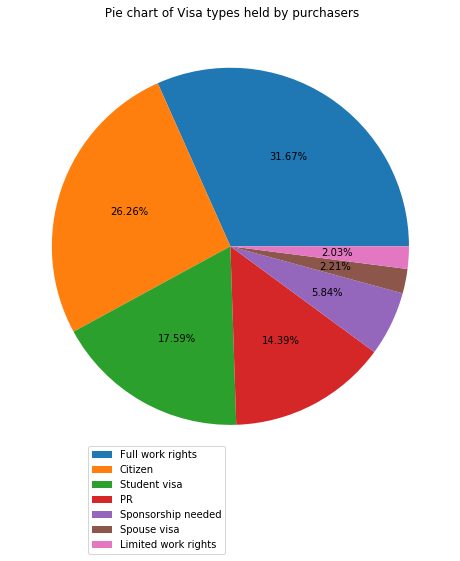

In [59]:
%matplotlib inline
Order['VISA'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%',figsize=(8,10),labels=None)
plt.ylabel('')
plt.title(" Pie chart of Visa types held by purchasers")
labels = Order['VISA'].value_counts().index
plt.legend(labels, loc="lower right",fontsize='medium',bbox_to_anchor=(0.5,-0.2))
plt.show()

### *Top 10 Email domains of purchasers*

In [60]:
Order['Domain']  = Order['Domain'].astype(str) #object dtype
Order['Domain'] = Order['Domain'].apply(lambda x: x.lower()) #lower case

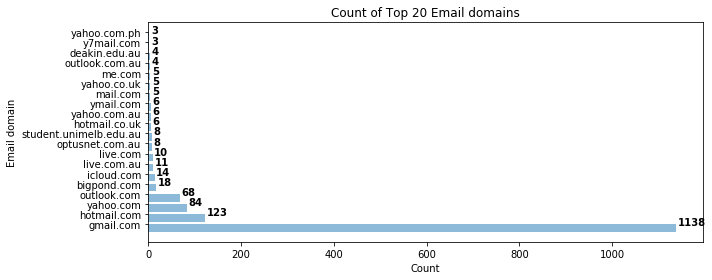

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax = plt.subplots(figsize=(10, 4))
#Plot 1
objects =  Order['Domain'].value_counts().index[0:20]
values = Order['Domain'].value_counts()[0:20].values
ind = np.arange(len(values))

width = .75
ax.barh(ind, values, width,align='center', alpha=0.5)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(objects, minor=False)

plt.title('Count of Top 20 Email domains')
plt.xlabel('Count')
plt.ylabel('Email domain')


for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

fig.tight_layout()
plt.show()
plt.draw()

### *Pie chart of Salary Range: insight on purchase*

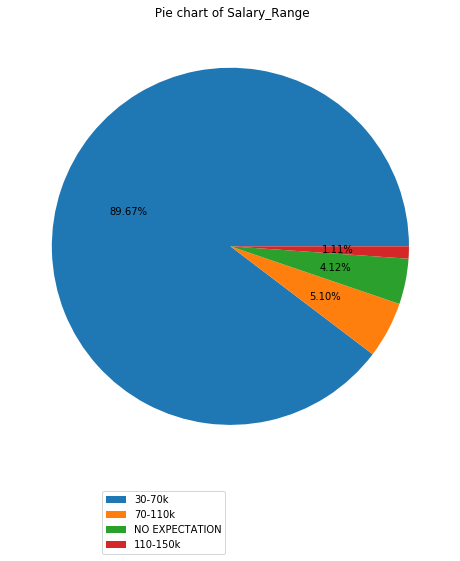

In [62]:
%matplotlib inline
Order['Salary_Range'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%',figsize=(8,10),labels=None)
plt.ylabel('')
plt.title(" Pie chart of Salary_Range")
labels = Order['Salary_Range'].value_counts().index
plt.legend(labels, loc="lower right",fontsize='medium',bbox_to_anchor=(0.5,-0.2))
plt.show()

### *Determining which Job Domain purchases the services more*

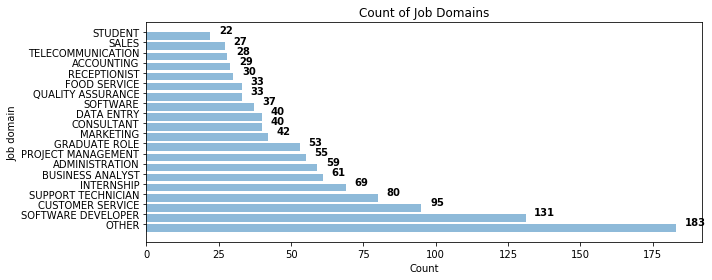

<Figure size 432x288 with 0 Axes>

In [63]:
fig, ax = plt.subplots(figsize=(10, 4))
#Plot 1
objects =  Order['Job_Domain'].value_counts().index[0:20]
values = Order['Job_Domain'].value_counts()[0:20].values
ind = np.arange(len(values))

width = .75
ax.barh(ind, values, width,align='center', alpha=0.5)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(objects, minor=False)

plt.title('Count of Job Domains')
plt.xlabel('Count')
plt.ylabel('Job domain')


for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

fig.tight_layout()
plt.show()
plt.draw()

### *Which Country makes the most purchases?* 

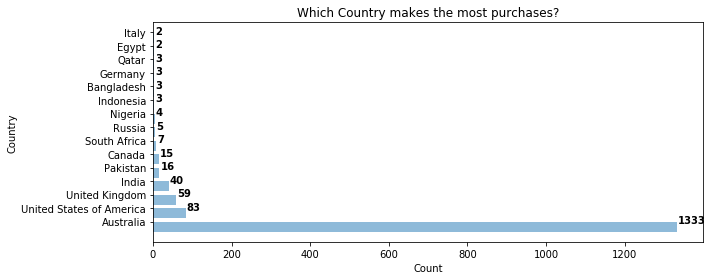

<Figure size 432x288 with 0 Axes>

In [64]:
fig, ax = plt.subplots(figsize=(10, 4))
#Plot 1
objects =  outerdf1['Country'].value_counts().index[0:15]
values = outerdf1['Country'].value_counts()[0:15].values
ind = np.arange(len(values))

width = .75
ax.barh(ind, values, width,align='center', alpha=0.5)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(objects, minor=False)

plt.title('Which Country makes the most purchases?')
plt.xlabel('Count')
plt.ylabel('Country')


for i, v in enumerate(values):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

fig.tight_layout()
plt.show()
plt.draw()

### *Determining which particular state performs better in terms of purchases made*

In [65]:
Count_country= Order.groupby(['Country', 'State']).size().reset_index().rename(columns={0: 'count_nationality',1:'countstate'})
#Count_country['Percentage'] = (Count_country['count_nationality']/Count_country['count_nationality'].sum()*100).round(2)
Count_country

,Country,State,count_nationality
0,ALBANIA,CENTRAL ALBANIA,1
1,ARGENTINA,UNKNOWN,2
2,AUSTRALIA,NEW SOUTH WALES,170
3,AUSTRALIA,QUEENSLAND,53
4,AUSTRALIA,SOUTH AUSTRALIA,46
...,...,...,...
98,UNITED STATES OF AMERICA,PENNSYLVANIA,3
99,UNITED STATES OF AMERICA,RHODE ISLAND,2
100,UNITED STATES OF AMERICA,SOUTH CAROLINA,1
101,UNITED STATES OF AMERICA,TEXAS,1


In [66]:
count_aus =Count_country[Count_country['Country']=='AUSTRALIA']
count_aus

,Country,State,count_nationality
2,AUSTRALIA,NEW SOUTH WALES,170
3,AUSTRALIA,QUEENSLAND,53
4,AUSTRALIA,SOUTH AUSTRALIA,46
5,AUSTRALIA,TASMANIA,3
6,AUSTRALIA,UNKNOWN,55
7,AUSTRALIA,VICTORIA,1010
8,AUSTRALIA,WESTERN AUSTRALIA,18


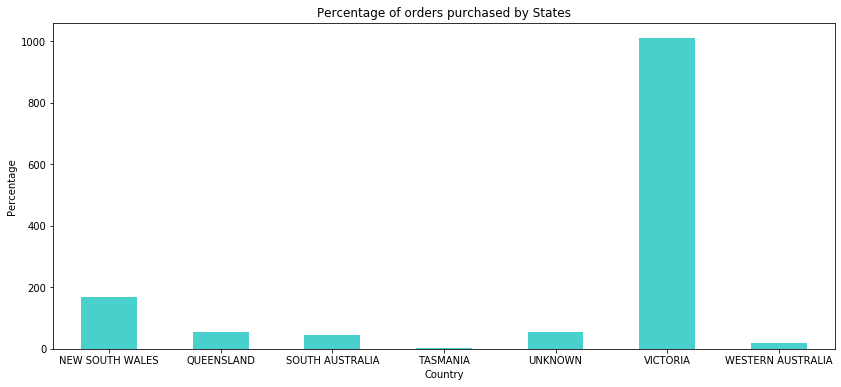

In [67]:
%matplotlib inline
viz_ctry=count_aus["count_nationality"].plot(kind='bar',color='mediumturquoise',figsize=(14,6))
plt.ylabel("Percentage")
plt.xlabel("Country")
xticks=count_aus['State']
viz_ctry.set_xticklabels(xticks,rotation=360)
plt.title("Percentage of orders purchased by States")
plt.show()

In [68]:
Order.head()

,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain,Salary_Range,SubmissionDate,SubmissionTime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80,VICTORIA,AUSTRALIA,CYBER SECURITY,30-70k,2020-07-02,23:59:00,2020-07,2020,07,2,Thursday
1,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38-45,VICTORIA,AUSTRALIA,MARKETING,30-70k,2020-07-02,21:06:43,2020-07,2020,07,2,Thursday
2,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER,30-70k,2020-07-02,18:32:32,2020-07,2020,07,2,Thursday
3,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30,PUNJAB,PAKISTAN,OTHER,30-70k,2020-07-02,04:52:57,2020-07,2020,07,2,Thursday
4,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST,30-70k,2020-07-02,01:45:27,2020-07,2020,07,2,Thursday


### *Count and percentage of signups by Year_Month*

In [70]:
def group_by_count_perc(df, feature):
    
    #Counts
    Counts_df = df.groupby(feature).size().reset_index().rename(columns={0: 'count_signups'})
    Counts_df['Percentage'] = (Counts_df['count_signups']/Counts_df['count_signups'].sum()*100).round(2)
    
    return Counts_df

In [71]:
group_by_count_perc(Order, 'Year_Month')

,Year_Month,count_signups,Percentage
0,2018-10,3,0.18
1,2018-11,14,0.86
2,2018-12,45,2.77
3,2019-01,9,0.55
4,2019-02,28,1.72
5,2019-03,37,2.28
6,2019-04,14,0.86
7,2019-05,49,3.01
8,2019-06,46,2.83
9,2019-07,122,7.50


In [72]:
YM = group_by_count_perc(Order, 'Year_Month')
def timeseries_plot(df):
    # Plot column 
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(df.iloc[:,0],df.iloc[:,1])
        ax.set_ylabel('Count of Signups')
        ax.set_xlabel(str(df.columns[0]))
        #ax.set_title('Time series plot of number orders by ' + str(df.columns[0]), size=18)
        # Show plot
        plt.show()

In [73]:
def perc_barplot(df):
        viz=df["Percentage"].plot(kind='bar',color='tomato',figsize=(6,4))
        plt.ylabel("Percentage")
        plt.xlabel(df.columns[0])
        xticks=df[df.columns[0]]
        viz.set_xticklabels(xticks,rotation=360)
        plt.title("Percentage of orders placed by " + df.columns[0])
       
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=9)
        
        plt.show()

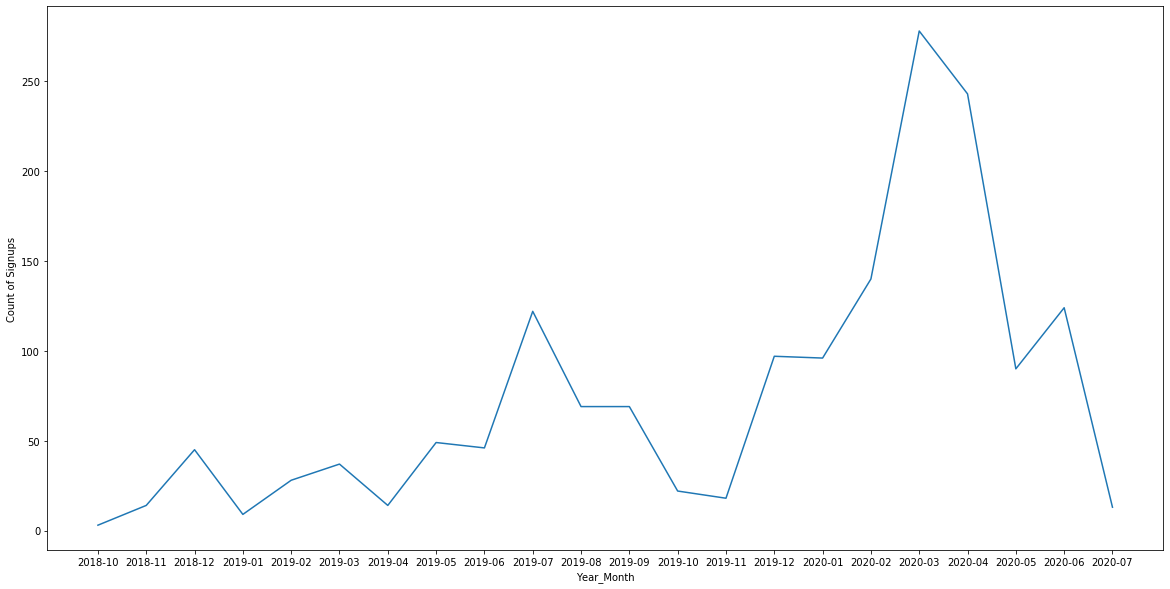

In [74]:
timeseries_plot(YM)

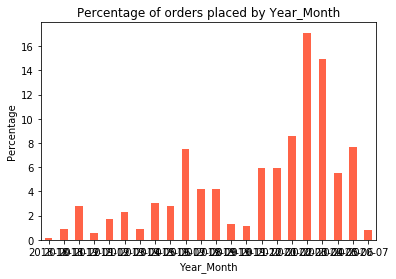

In [75]:
perc_barplot(YM)

### *Count and percentage of signups by Year*

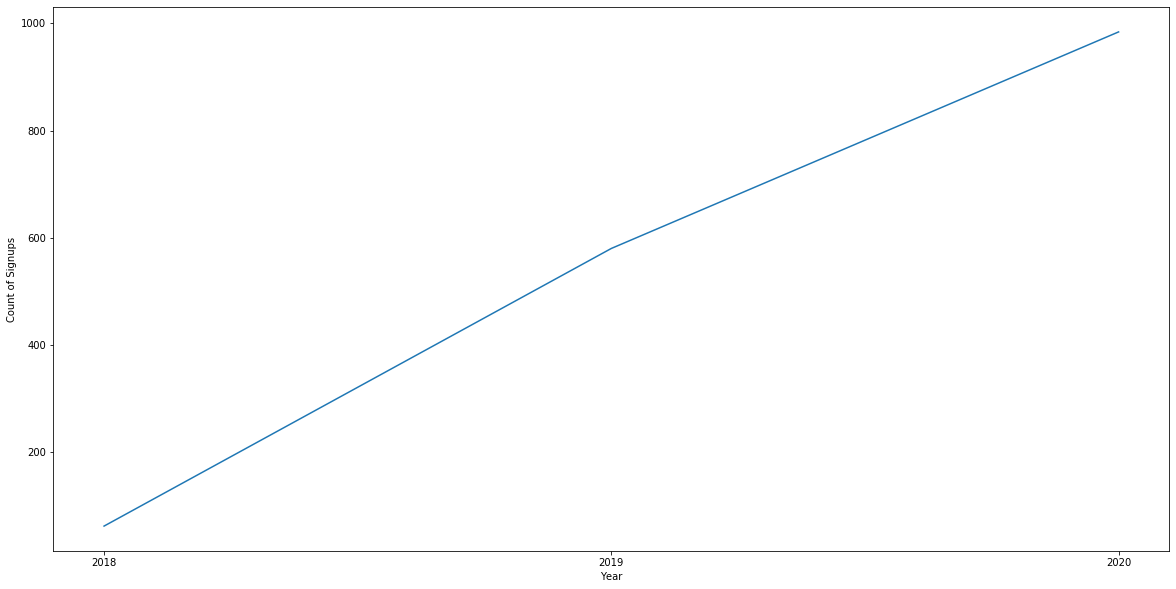

In [76]:
Y = group_by_count_perc(Order, 'Year')
timeseries_plot(Y)

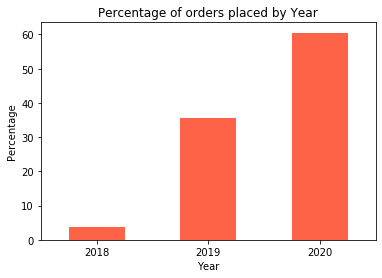

In [77]:
perc_barplot(Y)

### *Count and percentage of signups by Month*

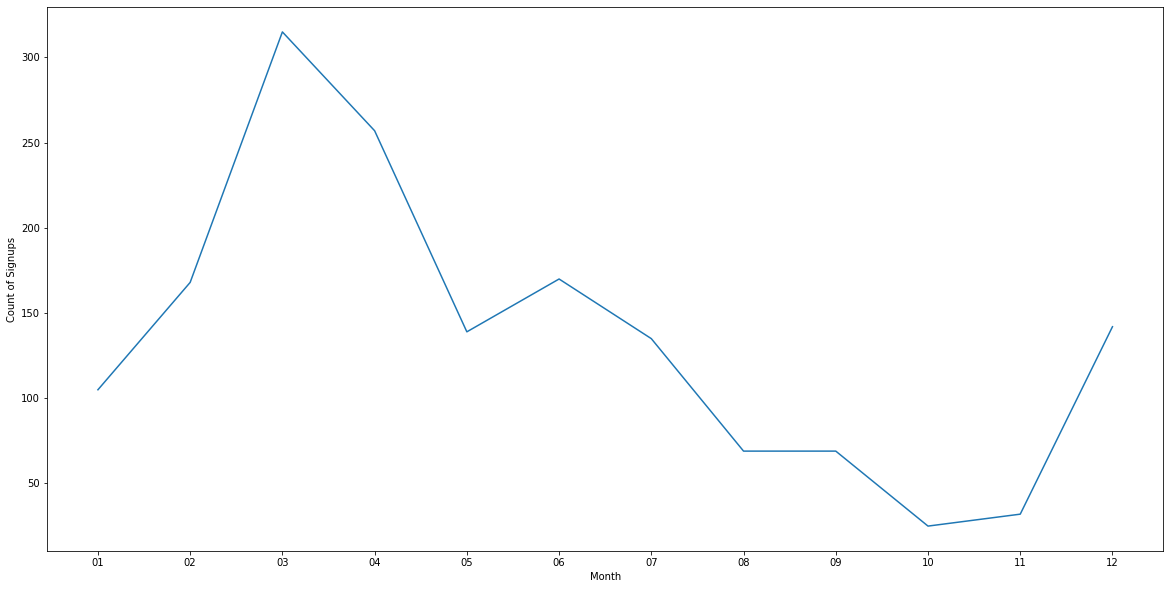

In [78]:
M = group_by_count_perc(Order, 'Month')
timeseries_plot(M)

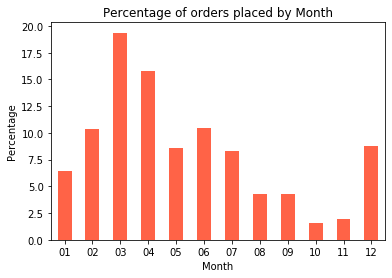

In [79]:
perc_barplot(M)

### *Measuring count of sign ups by DoM*

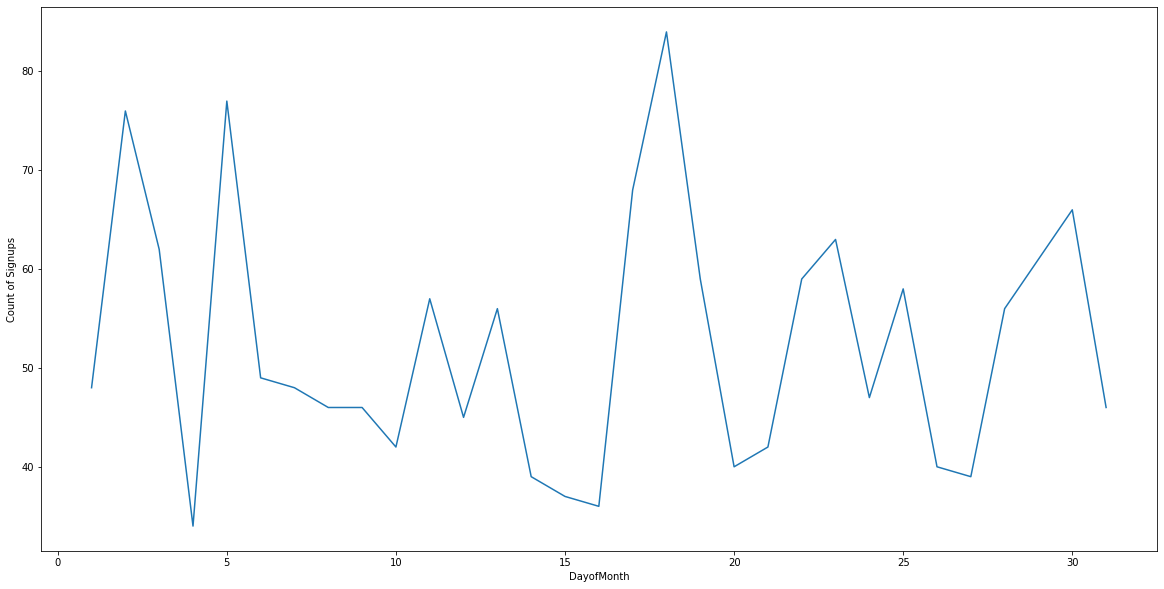

In [80]:
DoM = group_by_count_perc(Order, 'DayofMonth')
timeseries_plot(DoM)

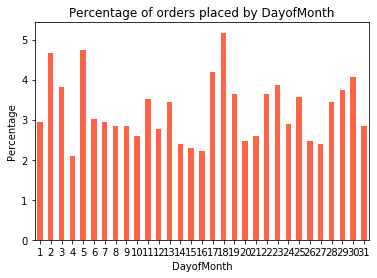

In [81]:
perc_barplot(DoM)

### *Measuring count of sign ups by DoW*

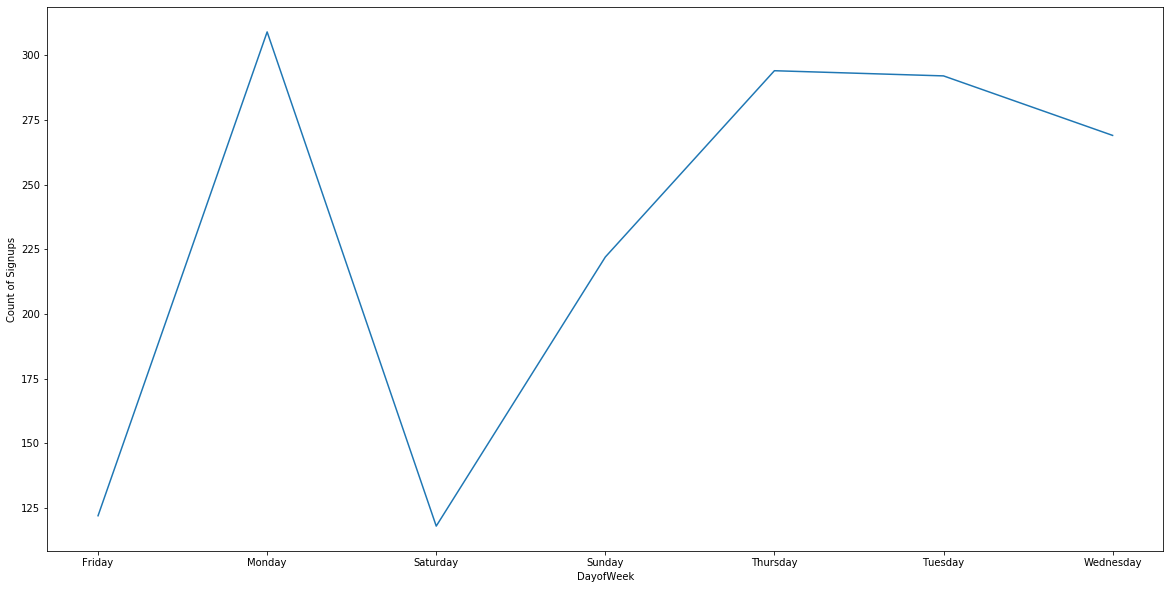

In [82]:
DoW = group_by_count_perc(Order, 'DayofWeek')
timeseries_plot(DoW)

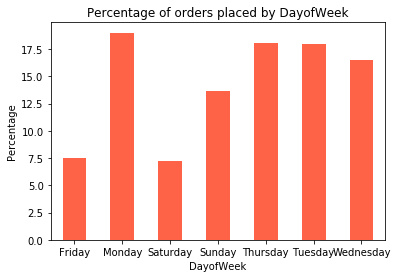

In [84]:
perc_barplot(DoW)

In [85]:
import datetime
Order['SubmissionDate']=pd.to_datetime(Order['SubmissionDate'])
Order.head()

,First_Name,Domain,Job_Title,City,VISA,Salary_Expectation,State,Country,Job_Domain,Salary_Range,SubmissionDate,SubmissionTime,Year_Month,Year,Month,DayofMonth,DayofWeek
0,Shreyans,gmail.com,CYBER SECURITY ANALYST,MELBOURNE,Student visa,60-80,VICTORIA,AUSTRALIA,CYBER SECURITY,30-70k,2020-07-02,23:59:00,2020-07,2020,07,2,Thursday
1,Kavneet,gmail.com,DIGITAL MARKETING,MELBOURNE,Full work rights,38-45,VICTORIA,AUSTRALIA,MARKETING,30-70k,2020-07-02,21:06:43,2020-07,2020,07,2,Thursday
2,Roba,gmail.com,GRAPHIC DESIGNER,CAIRO,Student visa,1500/2000,UNKNOWN,EGYPT,GRAPHIC DESIGNER,30-70k,2020-07-02,18:32:32,2020-07,2020,07,2,Thursday
3,Arooj,outlook.com,PHONE OPERATER,SARGODHA,Citizen,30,PUNJAB,PAKISTAN,OTHER,30-70k,2020-07-02,04:52:57,2020-07,2020,07,2,Thursday
4,Manisha,yahoo.com.au,RECEPTIONISTADMIN ASSISTANT,SYDNEY,Citizen,60-65,NEW SOUTH WALES,AUSTRALIA,RECEPTIONIST,30-70k,2020-07-02,01:45:27,2020-07,2020,07,2,Thursday


# K Modes Clustering 

In [86]:
# Dropping the columns with higher % of missing values and Submission ID feature is removed as it is irrelevant for analysis
Order_new = Order.drop(['First_Name','Domain','Job_Title','City','State','Salary_Expectation','SubmissionDate','SubmissionTime',
                       'Year_Month','Year','Month','DayofMonth', 'DayofWeek' ],axis=1)

In [87]:
Order_new.head()

,VISA,Country,Job_Domain,Salary_Range
0,Student visa,AUSTRALIA,CYBER SECURITY,30-70k
1,Full work rights,AUSTRALIA,MARKETING,30-70k
2,Student visa,EGYPT,GRAPHIC DESIGNER,30-70k
3,Citizen,PAKISTAN,OTHER,30-70k
4,Citizen,AUSTRALIA,RECEPTIONIST,30-70k


In [88]:
# First we will keep a copy of data
Order_new_copy = Order_new.copy()

In [89]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Order_new = Order_new.apply(le.fit_transform)
Order_new.head()

,VISA,Country,Job_Domain,Salary_Range
0,6,2,17,1
1,1,2,35,1
2,6,7,27,1
3,0,23,40,1
4,0,2,48,1


In [90]:
# Importing Libraries
!pip install kmodes
from kmodes.kmodes import KModes

# Using K-Mode with "Cao" initialization¶

In [91]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(Order_new)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2540.0


In [92]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [93]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = Order_new.columns

In [94]:
# Mode of the clusters
clusterCentroidsDf

,VISA,Country,Job_Domain,Salary_Range
0,1,2,40,1
1,0,2,62,1


# Using K-Mode with "Huang" initialization

In [95]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(Order_new)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37, cost: 2749.0


In [96]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

# Choosing K by comparing Cost against each K

In [97]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(Order_new)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2993.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2540.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 2262.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 31, cost: 2064.0


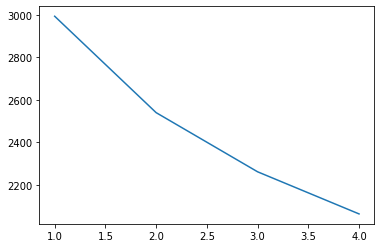

In [98]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Choosing K=2

In [99]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(Order_new)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2540.0


In [100]:
fitClusters_cao

array([0, 0, 0, ..., 1, 0, 0], dtype=uint16)

# Combining the predicted clusters with the original DF.

In [101]:
Order_new = Order_new_copy.reset_index()

In [102]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([Order_new, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [103]:
combinedDf.head()

,VISA,Country,Job_Domain,Salary_Range,cluster_predicted
0,Student visa,AUSTRALIA,CYBER SECURITY,30-70k,0
1,Full work rights,AUSTRALIA,MARKETING,30-70k,0
2,Student visa,EGYPT,GRAPHIC DESIGNER,30-70k,0
3,Citizen,PAKISTAN,OTHER,30-70k,0
4,Citizen,AUSTRALIA,RECEPTIONIST,30-70k,1


# Cluster Identification

In [104]:
combinedDf['cluster_predicted'].unique()

array([0, 1], dtype=uint16)

In [105]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

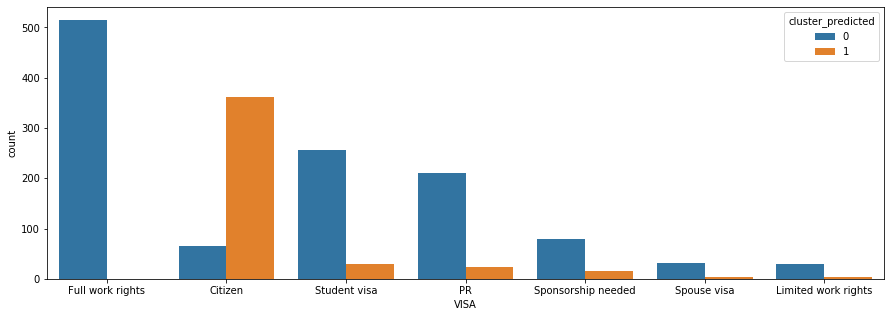

In [106]:
import seaborn as sns
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['VISA'],order=combinedDf['VISA'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

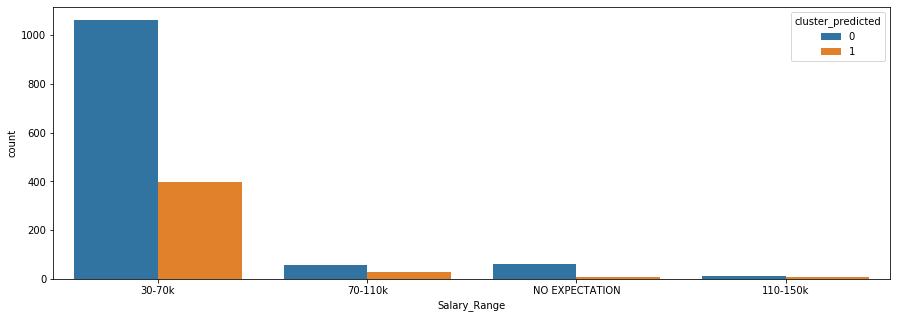

In [107]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Salary_Range'],order=combinedDf['Salary_Range'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

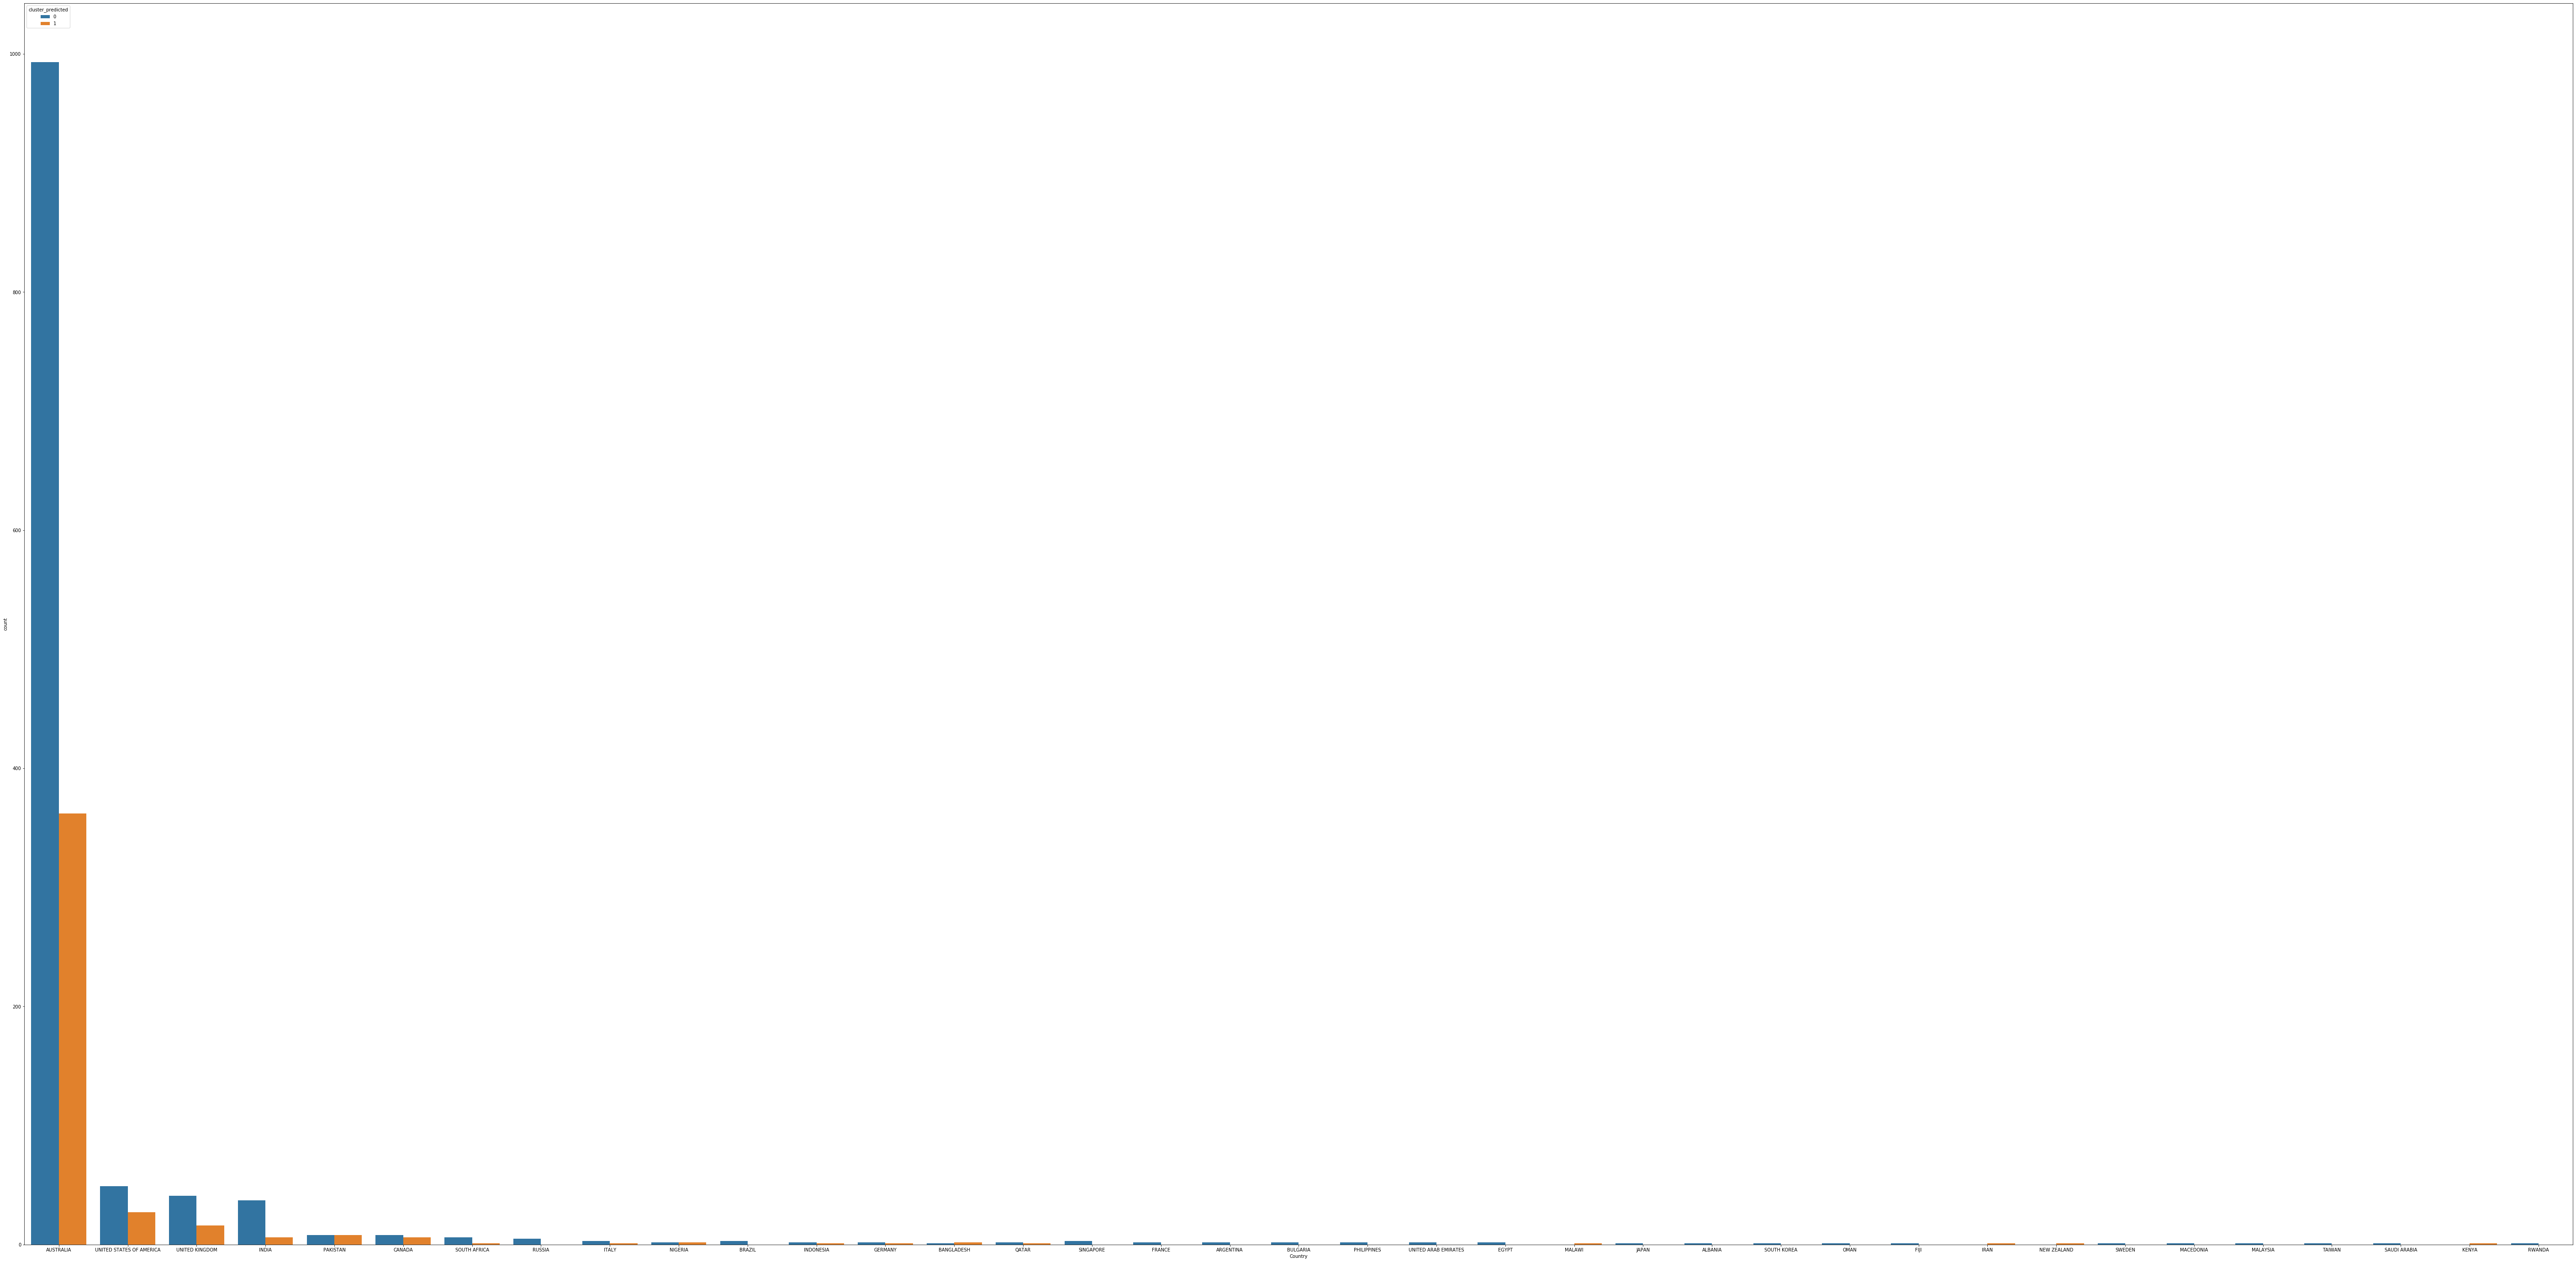

In [108]:
plt.subplots(figsize = (100,50))
sns.countplot(x=combinedDf['Country'],order=combinedDf['Country'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [109]:
plt.subplots(figsize = (200,100))
sns.countplot(x=combinedDf['Job_Domain'],order=combinedDf['Job_Domain'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()